In [205]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import numpy as np
from PIL import Image, ImageOps

from collections import defaultdict
import sys
from data import data_manager
from config.config_manager import _C as cfg
from config.config_manager import build_output
from tools.logger import setup_logger
logger = setup_logger(".")
cfg.merge_from_file("./reid_trick.yml")
# build_output(cfg, './par.yml')
# cfg.DATASET.TRAIN_PATH = "/home/allen.jc.lin/reid/"
cfg.DATASET.NAME = '26th'
# cfg.REID.MERGE = True
# cfg.PAR.SELECT_CAT = -1
# cfg.TRANSFORM.HFLIP = True
# cfg.TRANSFORM.RANDOMCROP = True
# cfg.TRANSFORM.NORMALIZE = True
# cfg.TRANSFORM.RESIZE = True
# cfg.TRANSFORM.COLORJIT = False
# cfg.TRANSFORM.RANDOMERASING = True
# cfg.TRANSFORM.SINGLE_CROP = False

dataset = get_img_data(cfg)

2019-11-08 09:24:56,663 logger INFO: => 26TH loaded
2019-11-08 09:24:56,664 logger INFO: Dataset statistics:
2019-11-08 09:24:56,665 logger INFO:   ------------------------------
2019-11-08 09:24:56,666 logger INFO:   subset   | # ids | # images
2019-11-08 09:24:56,668 logger INFO:   ------------------------------
2019-11-08 09:24:56,668 logger INFO:   train    |     0 |        0
2019-11-08 09:24:56,670 logger INFO:   query    |     9 |     2005
2019-11-08 09:24:56,671 logger INFO:   gallery  |     9 |     2005
2019-11-08 09:24:56,672 logger INFO:   ------------------------------
2019-11-08 09:24:56,673 logger INFO:   total    |     9 |     4010
2019-11-08 09:24:56,674 logger INFO:   ------------------------------


In [203]:
rs = np.load("evaluation/reid/OSNet_merge_cels_triplet_center_Adam_lr_0.003_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet/2019-11-08_09-22-08/rs.npy")
fg_ = np.load("evaluation/reid/OSNet_merge_cels_triplet_center_Adam_lr_0.003_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet/2019-11-08_09-22-08/filtered_gallery.npy")

In [207]:
len(pil_query)

2005

In [19]:
import seaborn as sns

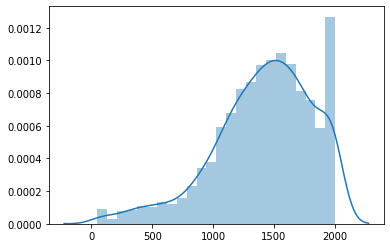

In [208]:
sns.distplot(rs)

In [210]:
fg = {}
for i in range(rs.shape[0]):
    remove = fg_[i] == -1
    fg[i] = fg_[i][~remove]

In [169]:
fg[0]

array([ 7003, 13579,  6022, ...,  3177,  9144, 14590])

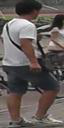

In [164]:
pil_query[0][0]

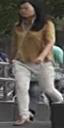

In [170]:
pil_gallery[14590][0]

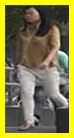

In [179]:
img_with_border = ImageOps.expand(pil_gallery[14590][0],border=5,fill='yellow')
img_with_border

In [181]:
pil_query[i]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x128 at 0x7F078A45B828>,
 1347,
 0,
 0)

In [186]:
pil_query[0]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x128 at 0x7F078A454DA0>,
 1347,
 0,
 0)

In [194]:
pil_gallery[12196]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x128 at 0x7F078A3269B0>,
 292,
 4,
 12196)

In [213]:
os.makedirs('/home/allen.jc.lin/26th/top_last10')

In [214]:
for i in range(rs.shape[0]):
    img, q_pid, _, _ = pil_query[i]
    img = ImageOps.expand(img,border=5,fill='yellow')
    for j in range(10):
        g_img, g_pid, _, _ = pil_gallery[fg[i][j]]
        if g_pid != q_pid:
            g_img = ImageOps.expand(g_img,border=5,fill='red')
        else:
            g_img = ImageOps.expand(g_img,border=5,fill='green')
        img = get_concat_h(img, g_img)
    for j in range(10):
        g_img, g_pid, _, _ = pil_gallery[fg[i][rs[i]-10+j]]
        if g_pid != q_pid:
            g_img = ImageOps.expand(g_img,border=5,fill='red')
        else:
            g_img = ImageOps.expand(g_img,border=5,fill='green')
        img = get_concat_h(img, g_img)
#     break
    img.save('/home/allen.jc.lin/26th/top_last10/{}.jpg'.format(i))

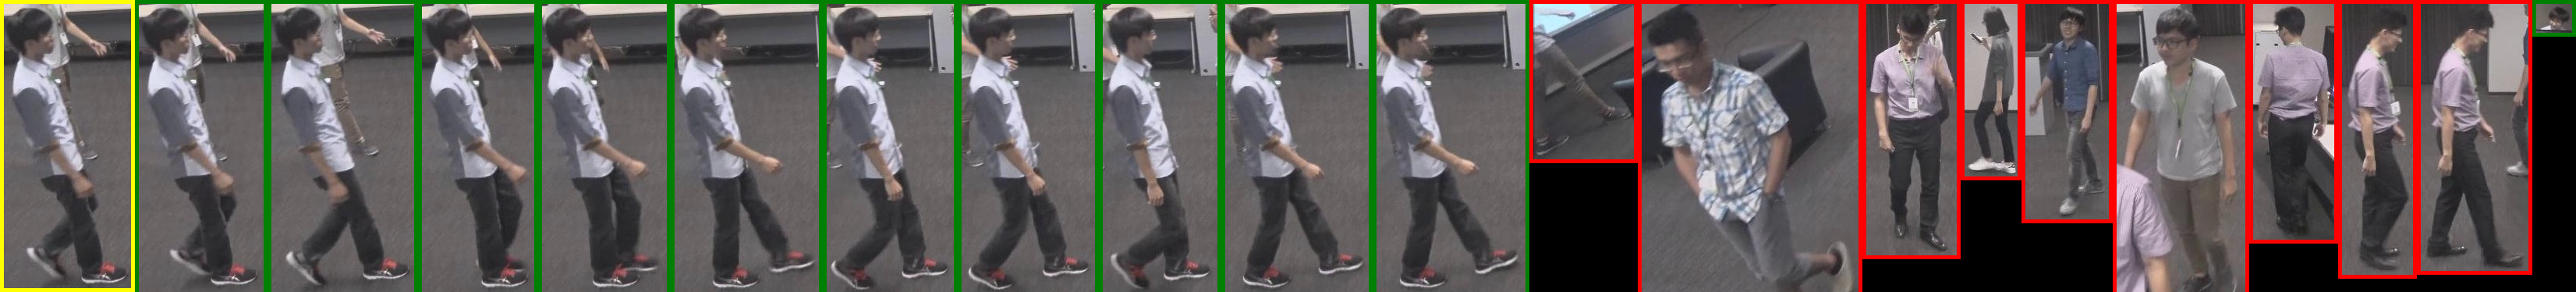

In [212]:
img

In [146]:
hard_query = np.arange(len(rs))[rs >= 10000]

hard_gallery = last[rs >= 10000]

from PIL import Image
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

os.makedirs('/home/allen.jc.lin/market1501/hard_sample')

for i, (q, g) in enumerate(zip(hard_query, hard_gallery)):
    img = get_concat_h(pil_query[q][0], pil_gallery[g][0])
    img.save('/home/allen.jc.lin/market1501/hard_sample/{}.jpg'.format(i))

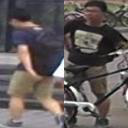

In [152]:
img

In [3]:
pids = defaultdict(int)
for path, pid, cam in dataset.gallery:
    pids[pid] += 1

In [4]:
pids

defaultdict(int,
            {17: 163,
             5: 164,
             9: 393,
             2: 74,
             14: 299,
             1: 400,
             4: 34,
             13: 259,
             15: 219})

In [1]:
0.00035*8

0.0028

In [4]:
from data.build_loader import build_reid_loader
loader = build_reid_loader(cfg)

2019-11-06 18:01:08,674 logger INFO: => MSMT17 loaded
2019-11-06 18:01:08,679 logger INFO: Dataset statistics:
2019-11-06 18:01:08,680 logger INFO:   ------------------------------
2019-11-06 18:01:08,681 logger INFO:   subset   | # ids | # images
2019-11-06 18:01:08,681 logger INFO:   ------------------------------
2019-11-06 18:01:08,682 logger INFO:   train    |  1041 |    32621
2019-11-06 18:01:08,683 logger INFO:   query    |  3060 |    11659
2019-11-06 18:01:08,683 logger INFO:   gallery  |  3060 |    82161
2019-11-06 18:01:08,684 logger INFO:   ------------------------------
2019-11-06 18:01:08,684 logger INFO:   total    |  4101 |   126441
2019-11-06 18:01:08,686 logger INFO:   ------------------------------
2019-11-06 18:01:08,749 logger INFO: => Market1501 loaded
2019-11-06 18:01:08,750 logger INFO: Dataset statistics:
2019-11-06 18:01:08,750 logger INFO:   ------------------------------
2019-11-06 18:01:08,751 logger INFO:   subset   | # ids | # images
2019-11-06 18:01:08,75

In [5]:
len(loader[0].dataset)

67656

In [6]:
1041+971+1816+767+702

5297

In [3]:
from data.build_transform import build_transform
val_trans = build_transform(cfg, isTrain=True)

In [4]:
path, _, _ = loader[0].sampler.data_source[0]

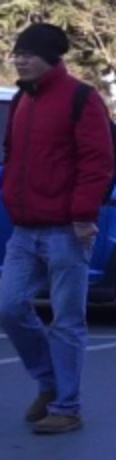

In [5]:
from PIL import Image
img = Image.open(path)
img

In [8]:
val_trans(img, 0.1)

TypeError: __call__() takes 2 positional arguments but 3 were given

In [206]:
from data.build_data import build_reid_dataset
from data.build_transform import build_transform
val_trans = build_transform(cfg, is_train=False)
gallery = build_reid_dataset(dataset.gallery, transform=val_trans, return_indice=True)
pil_gallery = build_reid_dataset(dataset.gallery, return_indice=True)
pil_query = build_reid_dataset(dataset.query, return_indice=True)

In [6]:
import torch.utils.data as data
g_loader = data.DataLoader(
        gallery, batch_size=cfg.INPUT.SIZE_TEST, shuffle=False, num_workers=2, pin_memory=True, drop_last=False
    )

In [7]:
from model.managers.manager_reid_trick import TrickManager
cfg.EVALUATE = './result/reid/OSNet_merge_cels_triplet_center_Adam_lr_0.003_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet/2019-11-06_16-35-52/weights/model_095_0.7096.pth'
cfg.MODEL.NUM_CLASSES = 5297
manager = TrickManager(cfg)

2019-11-07 15:23:08,893 logger INFO: Evaluating model from ./result/reid/OSNet_merge_cels_triplet_center_Adam_lr_0.003_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet/2019-11-06_16-35-52/weights/model_095_0.7096.pth
2019-11-07 15:23:08,964 logger INFO: opt_0 is skipped
2019-11-07 15:23:08,965 logger INFO: opt_1 is skipped
2019-11-07 15:23:08,972 logger INFO: model backbone.conv1.conv.weight                              ...... loaded
2019-11-07 15:23:08,973 logger INFO: model backbone.conv1.bn.weight                                ...... loaded
2019-11-07 15:23:08,974 logger INFO: model backbone.conv1.bn.bias                                  ...... loaded
2019-11-07 15:23:08,976 logger INFO: model backbone.conv1.bn.running_mean                          ...... loaded
2019-11-07 15:23:08,977 logger INFO: model backbone.conv1.bn.running_var                           ...... loaded
2019-11-07 15:23:08,978 logger INFO: model backbone.conv2.0.conv1.conv.weight                      ...... lo

2019-11-07 15:23:09,034 logger INFO: model backbone.conv2.0.conv2d.3.conv1.weight                  ...... loaded
2019-11-07 15:23:09,035 logger INFO: model backbone.conv2.0.conv2d.3.conv2.weight                  ...... loaded
2019-11-07 15:23:09,036 logger INFO: model backbone.conv2.0.conv2d.3.bn.weight                     ...... loaded
2019-11-07 15:23:09,037 logger INFO: model backbone.conv2.0.conv2d.3.bn.bias                       ...... loaded
2019-11-07 15:23:09,038 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_mean               ...... loaded
2019-11-07 15:23:09,038 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_var                ...... loaded
2019-11-07 15:23:09,039 logger INFO: model backbone.conv2.0.gate.fc1.weight                        ...... loaded
2019-11-07 15:23:09,040 logger INFO: model backbone.conv2.0.gate.fc1.bias                          ...... loaded
2019-11-07 15:23:09,041 logger INFO: model backbone.conv2.0.gate.fc2.weight                     

2019-11-07 15:23:09,088 logger INFO: model backbone.conv2.1.conv2d.1.conv1.weight                  ...... loaded
2019-11-07 15:23:09,089 logger INFO: model backbone.conv2.1.conv2d.1.conv2.weight                  ...... loaded
2019-11-07 15:23:09,089 logger INFO: model backbone.conv2.1.conv2d.1.bn.weight                     ...... loaded
2019-11-07 15:23:09,090 logger INFO: model backbone.conv2.1.conv2d.1.bn.bias                       ...... loaded
2019-11-07 15:23:09,091 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_mean               ...... loaded
2019-11-07 15:23:09,092 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_var                ...... loaded
2019-11-07 15:23:09,092 logger INFO: model backbone.conv2.1.conv2d.2.conv1.weight                  ...... loaded
2019-11-07 15:23:09,093 logger INFO: model backbone.conv2.1.conv2d.2.conv2.weight                  ...... loaded
2019-11-07 15:23:09,094 logger INFO: model backbone.conv2.1.conv2d.2.bn.weight                  

2019-11-07 15:23:09,190 logger INFO: model backbone.conv3.0.conv2c.2.conv1.weight                  ...... loaded
2019-11-07 15:23:09,191 logger INFO: model backbone.conv3.0.conv2c.2.conv2.weight                  ...... loaded
2019-11-07 15:23:09,193 logger INFO: model backbone.conv3.0.conv2c.2.bn.weight                     ...... loaded
2019-11-07 15:23:09,194 logger INFO: model backbone.conv3.0.conv2c.2.bn.bias                       ...... loaded
2019-11-07 15:23:09,195 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_mean               ...... loaded
2019-11-07 15:23:09,196 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_var                ...... loaded
2019-11-07 15:23:09,197 logger INFO: model backbone.conv3.0.conv2d.0.conv1.weight                  ...... loaded
2019-11-07 15:23:09,198 logger INFO: model backbone.conv3.0.conv2d.0.conv2.weight                  ...... loaded
2019-11-07 15:23:09,199 logger INFO: model backbone.conv3.0.conv2d.0.bn.weight                  

2019-11-07 15:23:09,273 logger INFO: model backbone.conv3.1.conv2c.0.conv1.weight                  ...... loaded
2019-11-07 15:23:09,274 logger INFO: model backbone.conv3.1.conv2c.0.conv2.weight                  ...... loaded
2019-11-07 15:23:09,275 logger INFO: model backbone.conv3.1.conv2c.0.bn.weight                     ...... loaded
2019-11-07 15:23:09,276 logger INFO: model backbone.conv3.1.conv2c.0.bn.bias                       ...... loaded
2019-11-07 15:23:09,277 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_mean               ...... loaded
2019-11-07 15:23:09,278 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_var                ...... loaded
2019-11-07 15:23:09,279 logger INFO: model backbone.conv3.1.conv2c.1.conv1.weight                  ...... loaded
2019-11-07 15:23:09,280 logger INFO: model backbone.conv3.1.conv2c.1.conv2.weight                  ...... loaded
2019-11-07 15:23:09,281 logger INFO: model backbone.conv3.1.conv2c.1.bn.weight                  

2019-11-07 15:23:09,353 logger INFO: model backbone.conv4.0.conv2b.0.conv1.weight                  ...... loaded
2019-11-07 15:23:09,354 logger INFO: model backbone.conv4.0.conv2b.0.conv2.weight                  ...... loaded
2019-11-07 15:23:09,355 logger INFO: model backbone.conv4.0.conv2b.0.bn.weight                     ...... loaded
2019-11-07 15:23:09,356 logger INFO: model backbone.conv4.0.conv2b.0.bn.bias                       ...... loaded
2019-11-07 15:23:09,357 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_mean               ...... loaded
2019-11-07 15:23:09,358 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_var                ...... loaded
2019-11-07 15:23:09,359 logger INFO: model backbone.conv4.0.conv2b.1.conv1.weight                  ...... loaded
2019-11-07 15:23:09,360 logger INFO: model backbone.conv4.0.conv2b.1.conv2.weight                  ...... loaded
2019-11-07 15:23:09,361 logger INFO: model backbone.conv4.0.conv2b.1.bn.weight                  

2019-11-07 15:23:09,419 logger INFO: model backbone.conv4.0.downsample.bn.running_var              ...... loaded
2019-11-07 15:23:09,421 logger INFO: model backbone.conv4.1.conv1.conv.weight                      ...... loaded
2019-11-07 15:23:09,422 logger INFO: model backbone.conv4.1.conv1.bn.weight                        ...... loaded
2019-11-07 15:23:09,422 logger INFO: model backbone.conv4.1.conv1.bn.bias                          ...... loaded
2019-11-07 15:23:09,424 logger INFO: model backbone.conv4.1.conv1.bn.running_mean                  ...... loaded
2019-11-07 15:23:09,425 logger INFO: model backbone.conv4.1.conv1.bn.running_var                   ...... loaded
2019-11-07 15:23:09,426 logger INFO: model backbone.conv4.1.conv2a.conv1.weight                    ...... loaded
2019-11-07 15:23:09,427 logger INFO: model backbone.conv4.1.conv2a.conv2.weight                    ...... loaded
2019-11-07 15:23:09,428 logger INFO: model backbone.conv4.1.conv2a.bn.weight                    

2019-11-07 15:23:09,484 logger INFO: model backbone.conv4.1.gate.fc1.bias                          ...... loaded
2019-11-07 15:23:09,485 logger INFO: model backbone.conv4.1.gate.fc2.weight                        ...... loaded
2019-11-07 15:23:09,486 logger INFO: model backbone.conv4.1.gate.fc2.bias                          ...... loaded
2019-11-07 15:23:09,487 logger INFO: model backbone.conv4.1.conv3.conv.weight                      ...... loaded
2019-11-07 15:23:09,488 logger INFO: model backbone.conv4.1.conv3.bn.weight                        ...... loaded
2019-11-07 15:23:09,489 logger INFO: model backbone.conv4.1.conv3.bn.bias                          ...... loaded
2019-11-07 15:23:09,490 logger INFO: model backbone.conv4.1.conv3.bn.running_mean                  ...... loaded
2019-11-07 15:23:09,491 logger INFO: model backbone.conv4.1.conv3.bn.running_var                   ...... loaded
2019-11-07 15:23:09,493 logger INFO: model backbone.conv5.conv.weight                           

In [8]:
from tools.utils import deploy_gpu
deploy_gpu(cfg)

2019-11-07 15:23:18,115 logger INFO: Using GPU: 0,1,2,3


In [9]:
manager.use_multigpu()

2019-11-07 15:23:18,421 logger INFO: Using GPU: 0,1,2,3
2019-11-07 15:23:18,423 logger INFO: Use Multi-GPUs


In [10]:
manager.model.eval()

DataParallel(
  (module): Model(
    (backbone): OSNet(
      (conv1): ConvLayer(
        (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn): InPlaceABN(64, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu[0.01])
      )
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (conv2): Sequential(
        (0): OSBlock(
          (conv1): Conv1x1(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): InPlaceABN(64, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu[0.01])
          )
          (conv2a): LightConv3x3(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (bn): InPlaceABN(64, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu[0.01])
          )
          (conv2b):

In [50]:
qf = []
pids = []
camids = []
indice = []
with torch.no_grad():    
    for batch in g_loader:

        imgs, pid, camid, idx = batch
        imgs = imgs.cuda()

        features = manager.model(imgs)
        features = F.normalize(features)

        qf.append(features.cpu())
        pids.append(pid)
        camids.append(camid)
        indice.append(idx.numpy())

    qf = torch.cat(qf, 0)
    pids = torch.cat(pids).numpy()
    camids = torch.cat(camids).numpy()
    
distmat =  1 - F.linear(qf, qf).numpy()

In [22]:
from tools.eval_reid_metrics import eval_recall

In [30]:
rs, confs, gts = eval_recall(distmat, pids, pids, camids, camids)

Recall: 100%|██████████| 2005/2005 [00:00<00:00, 7809.31it/s]


In [58]:
g_pids = pids
q_pids = pids
q_camids = camids
g_camids = camids

In [56]:
matches[0][:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

In [94]:
num_q, num_g = distmat.shape
indices = np.argsort(distmat, axis=1)
matches = (g_pids[indices] == q_pids[:, np.newaxis]).astype(np.int32)

num_rs = []
confs = []
num_gts = []
for q_idx in [0]:#tqdm(range(num_q), desc="Recall"):
    q_pid = q_pids[q_idx]
    q_camid = q_camids[q_idx]

    # remove gallery samples that have the same pid and camid with query
    order = indices[q_idx]    
    remove = (g_pids[order] == q_pid) & (g_camids[order] == q_camid)
    num_gt = (g_pids[order][~remove] == q_pid).sum()

    # compute cmc curve
    orig_cmc = matches[q_idx][~remove] # binary vector, positions with value 1 are correct matches

    if not np.any(orig_cmc):
        # this condition is true when query identity does not appear in gallery
        continue

    cmc = orig_cmc.cumsum()
#     num_r = (cmc == num_gt).argmax()+1
#     conf = np.max(1 - distmat[q_idx][order][~remove][num_r-1], 0)

#     num_rs.append(num_r)
#     confs.append(conf)
#     num_gts.append(num_gt)

In [66]:
(cmc == num_gt).argmax()+1

1336

In [76]:
indices[0][:1336]

array([   0, 1624,  472, ...,  321,  917,  598])

In [99]:
indices[0][~remove][:1336]

array([1624,  472, 1549, ...,  917,  598,  913])

In [105]:
indices[0][matches[0]==1]

array([   0, 1624,  472, 1549, 1734,  299, 1954,  699,  793, 1704, 1343,
       1276,  979,  353, 1678,  148, 1991,  577, 1579, 1706,  172, 1691,
       1214, 1618,  789, 1510,  848, 1333,  178,  279, 1802,  499,  483,
         23,  319, 1356, 1005, 1052, 1922, 1399, 1170, 1896,  558, 1727,
       1025,  799,  541, 1220, 1183,  234, 1371,  306,  894, 1921,  277,
        861, 1348,  298,  454,  684, 1503,  933,  939,  763,   44, 1403,
        950, 1453,  776,   82, 1842, 1533, 1139,   69,  378,  505,  655,
        506,  785, 1882,  212,  145, 1386, 1811, 1689, 1616,  444,  721,
        511,  469, 1096, 1193, 1102,  287,   13,  586,  208, 1091, 1471,
        452, 1527, 1567, 1418, 1507, 1512,   27,  156,  403, 1883, 1459,
       1221,  923, 1462, 1534, 1424, 1831, 1675,    7,  509,  124, 1524,
       1679,  974, 1687, 1674,  729, 1138,  811, 1087, 1282, 1513, 1877,
       1199,   57, 1178,  271, 1574, 1111, 1048, 1626, 1472,  859, 1035,
        400,  991,  857, 1773,  209,  204, 1009, 14

In [9]:
indice = np.concatenate(indice)

In [13]:
sort_idx = distmat.argsort(descending=True)

In [14]:
sort_idx[12][:10]

tensor([  12,  233, 1914,  537,  603,  227,   71,  988, 1128,  794])

In [15]:
import os
os.mkdir('/home/allen.jc.lin/26th_result')

In [27]:
sort_idx[i][:20]

tensor([   0,  377,  740,  511, 1547,  728,  721,  110, 1667,  695, 1133, 1726,
        1308, 1687, 1251,  219,  991, 1062,  525, 1509])

In [16]:
for i in range(distmat.shape[0]):
    dst = '/home/allen.jc.lin/26th_result/{}'.format(i)
    if not os.path.exists(dst):
        os.mkdir(dst)
        
    rank_idx = sort_idx[i][:20]
    for j, idx in enumerate(rank_idx):
        fname = os.path.join(dst, "{}_{:.4f}.jpg".format(j, distmat[i][idx]))
        pil_gallery[idx][0].save(fname)

In [17]:
from collections import defaultdict
import sys
from data import data_manager
from config.config_manager import _C as cfg
from config.config_manager import build_output
from tools.logger import setup_logger
logger = setup_logger(".")
cfg.merge_from_file("./par.yml")
# build_output(cfg, './par.yml')
cfg.DATASET.TRAIN_PATH = "/home/allen.jc.lin/PAR_ATTR_AUG/"
cfg.DATASET.NAME = 'par'
# cfg.REID.MERGE = True
cfg.PAR.IGNORE_CAT = [13]
cfg.PAR.SELECT_CAT = -1
# dataset = get_img_data(cfg)

In [18]:
cfg.EVALUATE = 'result/par/OSNet_par_multi_bce_SGD_lr_0.01_plateau_10_flip_crop_imagenet/2019-10-28_09-55-41/weights/model_045_3.2917.pth'
# cfg.EVALUATE = ""
cfg.RESUME = ""

In [19]:
import torch
from model.managers.manager_par import PARManager
from data.build_transform import build_transform
from PIL import Image
cfg.MODEL.GPU = [3]


In [2]:
from model.managers.manager_reid_mar import MARManager
manager = MARManager(cfg)

2019-10-30 17:31:35,952 logger INFO: Resuming model from /home/allen.jc.lin/deep-learning-works/result/reid/OSNet_msmt_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet/2019-10-29_15-46-56/weights/model_190_0.6371.pth
2019-10-30 17:31:36,016 logger INFO: opt_0 is skipped
2019-10-30 17:31:36,017 logger INFO: opt_1 is skipped
2019-10-30 17:31:36,022 logger INFO: model backbone.conv1.conv.weight                              ...... loaded
2019-10-30 17:31:36,023 logger INFO: model backbone.conv1.bn.weight                                ...... loaded
2019-10-30 17:31:36,024 logger INFO: model backbone.conv1.bn.bias                                  ...... loaded
2019-10-30 17:31:36,025 logger INFO: model backbone.conv1.bn.running_mean                          ...... loaded
2019-10-30 17:31:36,027 logger INFO: model backbone.conv1.bn.running_var                           ...... loaded
2019-10-30 17:31:36,028 logger INFO: model backbone.conv2.0.conv1.conv.w

2019-10-30 17:31:36,088 logger INFO: model backbone.conv2.0.conv2d.3.conv1.weight                  ...... loaded
2019-10-30 17:31:36,089 logger INFO: model backbone.conv2.0.conv2d.3.conv2.weight                  ...... loaded
2019-10-30 17:31:36,090 logger INFO: model backbone.conv2.0.conv2d.3.bn.weight                     ...... loaded
2019-10-30 17:31:36,091 logger INFO: model backbone.conv2.0.conv2d.3.bn.bias                       ...... loaded
2019-10-30 17:31:36,092 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_mean               ...... loaded
2019-10-30 17:31:36,093 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_var                ...... loaded
2019-10-30 17:31:36,093 logger INFO: model backbone.conv2.0.gate.fc1.weight                        ...... loaded
2019-10-30 17:31:36,094 logger INFO: model backbone.conv2.0.gate.fc1.bias                          ...... loaded
2019-10-30 17:31:36,095 logger INFO: model backbone.conv2.0.gate.fc2.weight                     

2019-10-30 17:31:36,144 logger INFO: model backbone.conv2.1.conv2d.1.conv1.weight                  ...... loaded
2019-10-30 17:31:36,145 logger INFO: model backbone.conv2.1.conv2d.1.conv2.weight                  ...... loaded
2019-10-30 17:31:36,146 logger INFO: model backbone.conv2.1.conv2d.1.bn.weight                     ...... loaded
2019-10-30 17:31:36,147 logger INFO: model backbone.conv2.1.conv2d.1.bn.bias                       ...... loaded
2019-10-30 17:31:36,147 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_mean               ...... loaded
2019-10-30 17:31:36,148 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_var                ...... loaded
2019-10-30 17:31:36,149 logger INFO: model backbone.conv2.1.conv2d.2.conv1.weight                  ...... loaded
2019-10-30 17:31:36,150 logger INFO: model backbone.conv2.1.conv2d.2.conv2.weight                  ...... loaded
2019-10-30 17:31:36,150 logger INFO: model backbone.conv2.1.conv2d.2.bn.weight                  

2019-10-30 17:31:36,279 logger INFO: model backbone.conv3.0.conv2c.2.conv1.weight                  ...... loaded
2019-10-30 17:31:36,280 logger INFO: model backbone.conv3.0.conv2c.2.conv2.weight                  ...... loaded
2019-10-30 17:31:36,281 logger INFO: model backbone.conv3.0.conv2c.2.bn.weight                     ...... loaded
2019-10-30 17:31:36,282 logger INFO: model backbone.conv3.0.conv2c.2.bn.bias                       ...... loaded
2019-10-30 17:31:36,283 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_mean               ...... loaded
2019-10-30 17:31:36,284 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_var                ...... loaded
2019-10-30 17:31:36,285 logger INFO: model backbone.conv3.0.conv2d.0.conv1.weight                  ...... loaded
2019-10-30 17:31:36,286 logger INFO: model backbone.conv3.0.conv2d.0.conv2.weight                  ...... loaded
2019-10-30 17:31:36,287 logger INFO: model backbone.conv3.0.conv2d.0.bn.weight                  

2019-10-30 17:31:36,350 logger INFO: model backbone.conv3.1.conv2c.0.conv1.weight                  ...... loaded
2019-10-30 17:31:36,351 logger INFO: model backbone.conv3.1.conv2c.0.conv2.weight                  ...... loaded
2019-10-30 17:31:36,352 logger INFO: model backbone.conv3.1.conv2c.0.bn.weight                     ...... loaded
2019-10-30 17:31:36,352 logger INFO: model backbone.conv3.1.conv2c.0.bn.bias                       ...... loaded
2019-10-30 17:31:36,353 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_mean               ...... loaded
2019-10-30 17:31:36,354 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_var                ...... loaded
2019-10-30 17:31:36,355 logger INFO: model backbone.conv3.1.conv2c.1.conv1.weight                  ...... loaded
2019-10-30 17:31:36,356 logger INFO: model backbone.conv3.1.conv2c.1.conv2.weight                  ...... loaded
2019-10-30 17:31:36,357 logger INFO: model backbone.conv3.1.conv2c.1.bn.weight                  

2019-10-30 17:31:36,406 logger INFO: model backbone.conv4.0.conv2b.0.conv1.weight                  ...... loaded
2019-10-30 17:31:36,407 logger INFO: model backbone.conv4.0.conv2b.0.conv2.weight                  ...... loaded
2019-10-30 17:31:36,407 logger INFO: model backbone.conv4.0.conv2b.0.bn.weight                     ...... loaded
2019-10-30 17:31:36,408 logger INFO: model backbone.conv4.0.conv2b.0.bn.bias                       ...... loaded
2019-10-30 17:31:36,409 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_mean               ...... loaded
2019-10-30 17:31:36,410 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_var                ...... loaded
2019-10-30 17:31:36,410 logger INFO: model backbone.conv4.0.conv2b.1.conv1.weight                  ...... loaded
2019-10-30 17:31:36,411 logger INFO: model backbone.conv4.0.conv2b.1.conv2.weight                  ...... loaded
2019-10-30 17:31:36,412 logger INFO: model backbone.conv4.0.conv2b.1.bn.weight                  

2019-10-30 17:31:36,457 logger INFO: model backbone.conv4.0.downsample.bn.running_var              ...... loaded
2019-10-30 17:31:36,458 logger INFO: model backbone.conv4.1.conv1.conv.weight                      ...... loaded
2019-10-30 17:31:36,459 logger INFO: model backbone.conv4.1.conv1.bn.weight                        ...... loaded
2019-10-30 17:31:36,460 logger INFO: model backbone.conv4.1.conv1.bn.bias                          ...... loaded
2019-10-30 17:31:36,461 logger INFO: model backbone.conv4.1.conv1.bn.running_mean                  ...... loaded
2019-10-30 17:31:36,461 logger INFO: model backbone.conv4.1.conv1.bn.running_var                   ...... loaded
2019-10-30 17:31:36,462 logger INFO: model backbone.conv4.1.conv2a.conv1.weight                    ...... loaded
2019-10-30 17:31:36,463 logger INFO: model backbone.conv4.1.conv2a.conv2.weight                    ...... loaded
2019-10-30 17:31:36,464 logger INFO: model backbone.conv4.1.conv2a.bn.weight                    

2019-10-30 17:31:36,511 logger INFO: model backbone.conv4.1.gate.fc1.bias                          ...... loaded
2019-10-30 17:31:36,512 logger INFO: model backbone.conv4.1.gate.fc2.weight                        ...... loaded
2019-10-30 17:31:36,513 logger INFO: model backbone.conv4.1.gate.fc2.bias                          ...... loaded
2019-10-30 17:31:36,518 logger INFO: model backbone.conv4.1.conv3.conv.weight                      ...... loaded
2019-10-30 17:31:36,519 logger INFO: model backbone.conv4.1.conv3.bn.weight                        ...... loaded
2019-10-30 17:31:36,520 logger INFO: model backbone.conv4.1.conv3.bn.bias                          ...... loaded
2019-10-30 17:31:36,521 logger INFO: model backbone.conv4.1.conv3.bn.running_mean                  ...... loaded
2019-10-30 17:31:36,522 logger INFO: model backbone.conv4.1.conv3.bn.running_var                   ...... loaded
2019-10-30 17:31:36,524 logger INFO: model backbone.conv5.conv.weight                           

In [4]:
from tools.utils import deploy_gpu
deploy_gpu(cfg)

2019-10-30 16:50:43,653 logger INFO: Using GPU: 0,1,2,3


In [5]:
manager.use_multigpu()

2019-10-30 16:50:53,821 logger INFO: Using GPU: 0,1,2,3
2019-10-30 16:50:54,499 logger INFO: Use Multi-GPUs


In [14]:
manager.model.module.id_fc.weight.shape

torch.Size([2012, 512])

In [28]:
for name, p in manager.model.named_parameters():
    print(name)

backbone.conv1.conv.weight
backbone.conv1.bn.weight
backbone.conv1.bn.bias
backbone.conv2.0.conv1.conv.weight
backbone.conv2.0.conv1.bn.weight
backbone.conv2.0.conv1.bn.bias
backbone.conv2.0.conv2a.conv1.weight
backbone.conv2.0.conv2a.conv2.weight
backbone.conv2.0.conv2a.bn.weight
backbone.conv2.0.conv2a.bn.bias
backbone.conv2.0.conv2b.0.conv1.weight
backbone.conv2.0.conv2b.0.conv2.weight
backbone.conv2.0.conv2b.0.bn.weight
backbone.conv2.0.conv2b.0.bn.bias
backbone.conv2.0.conv2b.1.conv1.weight
backbone.conv2.0.conv2b.1.conv2.weight
backbone.conv2.0.conv2b.1.bn.weight
backbone.conv2.0.conv2b.1.bn.bias
backbone.conv2.0.conv2c.0.conv1.weight
backbone.conv2.0.conv2c.0.conv2.weight
backbone.conv2.0.conv2c.0.bn.weight
backbone.conv2.0.conv2c.0.bn.bias
backbone.conv2.0.conv2c.1.conv1.weight
backbone.conv2.0.conv2c.1.conv2.weight
backbone.conv2.0.conv2c.1.bn.weight
backbone.conv2.0.conv2c.1.bn.bias
backbone.conv2.0.conv2c.2.conv1.weight
backbone.conv2.0.conv2c.2.conv2.weight
backbone.conv2.0

In [5]:
manager.use_multigpu()

2019-10-29 11:01:21,203 logger INFO: Using GPU: 3,
2019-10-29 11:01:21,259 logger INFO: Use Single-GPU


In [43]:
img = Image.open("/mnt/new/s1/Allen/par_test3.jpg")
trans = build_transform(cfg, isTrain=False)
img_tensor = trans(img).unsqueeze(0)

manager.model.eval()
with torch.no_grad():
    out = manager.model(img_tensor.cuda()).squeeze().cpu().numpy()

import numpy as np
cats = np.array(manager.category_names)
print(cats[out>0.5])

['gender' 'sleeve']


In [37]:
out

array([6.0191043e-03, 4.7974807e-01, 1.3915966e-05, 1.8892837e-04,
       8.1782907e-01, 2.7350327e-02, 9.4502959e-03, 3.1194614e-02,
       9.9929678e-01, 9.0992486e-01, 4.1697454e-02, 1.0474664e-03],
      dtype=float32)

In [2]:
count = defaultdict(int)
for _, pid, _ in dataset.query:
    count[pid] += 1

In [3]:
temp = count.copy()
for pid in count.keys():
    if count[pid] < 4:
        temp.pop(pid, None)

In [5]:
len(temp)

1535

In [8]:
import torch
state = torch.load('/home/allen.jc.lin/OSNet_market_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.9495.pth')

RuntimeError: CUDA error: out of memory

In [2]:
from data.build_loader import build_par_loader

In [3]:
train, _ = build_par_loader(cfg)

2019-10-25 14:46:43,601 logger INFO: => PAR loaded
2019-10-25 14:46:43,603 logger INFO: Dataset statistics:
2019-10-25 14:46:43,603 logger INFO:   ------------------------------
2019-10-25 14:46:43,604 logger INFO:   subset   | backpack | # images
2019-10-25 14:46:43,604 logger INFO:   ------------------------------
2019-10-25 14:46:43,605 logger INFO:   train    |      12 |  2051631
2019-10-25 14:46:43,606 logger INFO:   val      |      12 |   652015
2019-10-25 14:46:43,607 logger INFO:   ------------------------------


In [4]:
len(train)

2833

In [5]:
from model.managers.manager_reid_ssg import SSGManager
manager = SSGManager(cfg)

2019-10-24 14:11:59,094 logger INFO: Resuming model from /home/allen.jc.lin/OSNet_market_cels_triplet_center_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.9495.pth
2019-10-24 14:11:59,220 logger INFO: opt_0 is skipped
2019-10-24 14:11:59,222 logger INFO: opt_1 is skipped
2019-10-24 14:11:59,227 logger INFO: model backbone.conv1.conv.weight                                   ...... loaded
2019-10-24 14:11:59,228 logger INFO: model backbone.conv1.bn.weight                                     ...... loaded
2019-10-24 14:11:59,229 logger INFO: model backbone.conv1.bn.bias                                       ...... loaded
2019-10-24 14:11:59,231 logger INFO: model backbone.conv1.bn.running_mean                               ...... loaded
2019-10-24 14:11:59,232 logger INFO: model backbone.conv1.bn.running_var                                ...... loaded
2019-10-24 14:11:59,233 logger INFO: model backbone.conv1.bn.num_batches_tracked                        ...... load

2019-10-24 14:11:59,305 logger INFO: model backbone.conv2.0.conv2d.1.conv2.weight                       ...... loaded
2019-10-24 14:11:59,306 logger INFO: model backbone.conv2.0.conv2d.1.bn.weight                          ...... loaded
2019-10-24 14:11:59,307 logger INFO: model backbone.conv2.0.conv2d.1.bn.bias                            ...... loaded
2019-10-24 14:11:59,308 logger INFO: model backbone.conv2.0.conv2d.1.bn.running_mean                    ...... loaded
2019-10-24 14:11:59,309 logger INFO: model backbone.conv2.0.conv2d.1.bn.running_var                     ...... loaded
2019-10-24 14:11:59,311 logger INFO: model backbone.conv2.0.conv2d.1.bn.num_batches_tracked             ...... loaded
2019-10-24 14:11:59,312 logger INFO: model backbone.conv2.0.conv2d.2.conv1.weight                       ...... loaded
2019-10-24 14:11:59,313 logger INFO: model backbone.conv2.0.conv2d.2.conv2.weight                       ...... loaded
2019-10-24 14:11:59,314 logger INFO: model backbone.conv

2019-10-24 14:11:59,372 logger INFO: model backbone.conv2.1.conv2c.0.conv2.weight                       ...... loaded
2019-10-24 14:11:59,373 logger INFO: model backbone.conv2.1.conv2c.0.bn.weight                          ...... loaded
2019-10-24 14:11:59,374 logger INFO: model backbone.conv2.1.conv2c.0.bn.bias                            ...... loaded
2019-10-24 14:11:59,374 logger INFO: model backbone.conv2.1.conv2c.0.bn.running_mean                    ...... loaded
2019-10-24 14:11:59,375 logger INFO: model backbone.conv2.1.conv2c.0.bn.running_var                     ...... loaded
2019-10-24 14:11:59,376 logger INFO: model backbone.conv2.1.conv2c.0.bn.num_batches_tracked             ...... loaded
2019-10-24 14:11:59,377 logger INFO: model backbone.conv2.1.conv2c.1.conv1.weight                       ...... loaded
2019-10-24 14:11:59,378 logger INFO: model backbone.conv2.1.conv2c.1.conv2.weight                       ...... loaded
2019-10-24 14:11:59,379 logger INFO: model backbone.conv

2019-10-24 14:11:59,445 logger INFO: model backbone.conv3.0.conv1.conv.weight                           ...... loaded
2019-10-24 14:11:59,446 logger INFO: model backbone.conv3.0.conv1.bn.weight                             ...... loaded
2019-10-24 14:11:59,448 logger INFO: model backbone.conv3.0.conv1.bn.bias                               ...... loaded
2019-10-24 14:11:59,449 logger INFO: model backbone.conv3.0.conv1.bn.running_mean                       ...... loaded
2019-10-24 14:11:59,450 logger INFO: model backbone.conv3.0.conv1.bn.running_var                        ...... loaded
2019-10-24 14:11:59,452 logger INFO: model backbone.conv3.0.conv1.bn.num_batches_tracked                ...... loaded
2019-10-24 14:11:59,453 logger INFO: model backbone.conv3.0.conv2a.conv1.weight                         ...... loaded
2019-10-24 14:11:59,454 logger INFO: model backbone.conv3.0.conv2a.conv2.weight                         ...... loaded
2019-10-24 14:11:59,456 logger INFO: model backbone.conv

2019-10-24 14:11:59,531 logger INFO: model backbone.conv3.0.conv2d.2.bn.weight                          ...... loaded
2019-10-24 14:11:59,532 logger INFO: model backbone.conv3.0.conv2d.2.bn.bias                            ...... loaded
2019-10-24 14:11:59,534 logger INFO: model backbone.conv3.0.conv2d.2.bn.running_mean                    ...... loaded
2019-10-24 14:11:59,535 logger INFO: model backbone.conv3.0.conv2d.2.bn.running_var                     ...... loaded
2019-10-24 14:11:59,536 logger INFO: model backbone.conv3.0.conv2d.2.bn.num_batches_tracked             ...... loaded
2019-10-24 14:11:59,537 logger INFO: model backbone.conv3.0.conv2d.3.conv1.weight                       ...... loaded
2019-10-24 14:11:59,539 logger INFO: model backbone.conv3.0.conv2d.3.conv2.weight                       ...... loaded
2019-10-24 14:11:59,540 logger INFO: model backbone.conv3.0.conv2d.3.bn.weight                          ...... loaded
2019-10-24 14:11:59,541 logger INFO: model backbone.conv

2019-10-24 14:11:59,607 logger INFO: model backbone.conv3.1.conv2c.1.bn.weight                          ...... loaded
2019-10-24 14:11:59,608 logger INFO: model backbone.conv3.1.conv2c.1.bn.bias                            ...... loaded
2019-10-24 14:11:59,609 logger INFO: model backbone.conv3.1.conv2c.1.bn.running_mean                    ...... loaded
2019-10-24 14:11:59,610 logger INFO: model backbone.conv3.1.conv2c.1.bn.running_var                     ...... loaded
2019-10-24 14:11:59,611 logger INFO: model backbone.conv3.1.conv2c.1.bn.num_batches_tracked             ...... loaded
2019-10-24 14:11:59,612 logger INFO: model backbone.conv3.1.conv2c.2.conv1.weight                       ...... loaded
2019-10-24 14:11:59,614 logger INFO: model backbone.conv3.1.conv2c.2.conv2.weight                       ...... loaded
2019-10-24 14:11:59,615 logger INFO: model backbone.conv3.1.conv2c.2.bn.weight                          ...... loaded
2019-10-24 14:11:59,616 logger INFO: model backbone.conv

2019-10-24 14:11:59,671 logger INFO: model backbone.conv4.0.conv2a.bn.weight                            ...... loaded
2019-10-24 14:11:59,672 logger INFO: model backbone.conv4.0.conv2a.bn.bias                              ...... loaded
2019-10-24 14:11:59,673 logger INFO: model backbone.conv4.0.conv2a.bn.running_mean                      ...... loaded
2019-10-24 14:11:59,674 logger INFO: model backbone.conv4.0.conv2a.bn.running_var                       ...... loaded
2019-10-24 14:11:59,675 logger INFO: model backbone.conv4.0.conv2a.bn.num_batches_tracked               ...... loaded
2019-10-24 14:11:59,676 logger INFO: model backbone.conv4.0.conv2b.0.conv1.weight                       ...... loaded
2019-10-24 14:11:59,677 logger INFO: model backbone.conv4.0.conv2b.0.conv2.weight                       ...... loaded
2019-10-24 14:11:59,678 logger INFO: model backbone.conv4.0.conv2b.0.bn.weight                          ...... loaded
2019-10-24 14:11:59,679 logger INFO: model backbone.conv

2019-10-24 14:11:59,735 logger INFO: model backbone.conv4.0.conv2d.3.bn.bias                            ...... loaded
2019-10-24 14:11:59,736 logger INFO: model backbone.conv4.0.conv2d.3.bn.running_mean                    ...... loaded
2019-10-24 14:11:59,737 logger INFO: model backbone.conv4.0.conv2d.3.bn.running_var                     ...... loaded
2019-10-24 14:11:59,738 logger INFO: model backbone.conv4.0.conv2d.3.bn.num_batches_tracked             ...... loaded
2019-10-24 14:11:59,739 logger INFO: model backbone.conv4.0.gate.fc1.weight                             ...... loaded
2019-10-24 14:11:59,740 logger INFO: model backbone.conv4.0.gate.fc1.bias                               ...... loaded
2019-10-24 14:11:59,741 logger INFO: model backbone.conv4.0.gate.fc2.weight                             ...... loaded
2019-10-24 14:11:59,742 logger INFO: model backbone.conv4.0.gate.fc2.bias                               ...... loaded
2019-10-24 14:11:59,743 logger INFO: model backbone.conv

2019-10-24 14:11:59,797 logger INFO: model backbone.conv4.1.conv2c.2.bn.bias                            ...... loaded
2019-10-24 14:11:59,798 logger INFO: model backbone.conv4.1.conv2c.2.bn.running_mean                    ...... loaded
2019-10-24 14:11:59,799 logger INFO: model backbone.conv4.1.conv2c.2.bn.running_var                     ...... loaded
2019-10-24 14:11:59,800 logger INFO: model backbone.conv4.1.conv2c.2.bn.num_batches_tracked             ...... loaded
2019-10-24 14:11:59,800 logger INFO: model backbone.conv4.1.conv2d.0.conv1.weight                       ...... loaded
2019-10-24 14:11:59,801 logger INFO: model backbone.conv4.1.conv2d.0.conv2.weight                       ...... loaded
2019-10-24 14:11:59,802 logger INFO: model backbone.conv4.1.conv2d.0.bn.weight                          ...... loaded
2019-10-24 14:11:59,803 logger INFO: model backbone.conv4.1.conv2d.0.bn.bias                            ...... loaded
2019-10-24 14:11:59,804 logger INFO: model backbone.conv

In [18]:
manager.set_save_path('cycle_0')

In [19]:
manager.save_path

'result/reid/OSNet_duke_ssg_triplet_notrick_Adam_lr_0.00035_warmup_10_0.01_plateau_10_flip_crop_imagenet/2019-10-24_14-11-54/cycle_0'

In [23]:
import os
os.getcwd()

'/home/allen.jc.lin/deep-learning-works'

In [28]:
3.5*1e-6

3.5e-06

In [2]:
import torch
torch.__version__

'1.2.0'

In [22]:
from glob import glob
sorted(glob('result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model*'))

['result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_002_0.1010.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_003_0.1742.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_004_0.2597.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_005_0.2876.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_006_0.3412.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_007_0.3651.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_008_0.3839.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_009_0.4089.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_010_0.4256.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/model_011_0.4316.pth',
 'result/imagenet/OSNet_ce_SGD_plateau_warmup_lr0.01_ImageNet/weights/

In [2]:
from model.managers.manager_imagenet import ImageNetManager
from data.build_loader import build_update_reid_dataset, build_update_reid_loader
from data.build_transform import build_transform
from data.data import get_img_data

In [3]:
dataset = get_img_data(cfg)

2019-10-24 10:35:51,037 logger INFO: => DukeMTMC-reID loaded
2019-10-24 10:35:51,038 logger INFO: Dataset statistics:
2019-10-24 10:35:51,039 logger INFO:   ------------------------------
2019-10-24 10:35:51,039 logger INFO:   subset   | # ids | # images
2019-10-24 10:35:51,040 logger INFO:   ------------------------------
2019-10-24 10:35:51,040 logger INFO:   train    |   702 |    16522
2019-10-24 10:35:51,041 logger INFO:   query    |   702 |     2228
2019-10-24 10:35:51,042 logger INFO:   gallery  |  1110 |    17661
2019-10-24 10:35:51,042 logger INFO:   ------------------------------
2019-10-24 10:35:51,043 logger INFO:   total    |  1404 |    36411
2019-10-24 10:35:51,044 logger INFO:   ------------------------------


In [4]:
import numpy as np
labels = np.random.randint(0,702,len(dataset.train)).tolist()


In [5]:

data = build_update_reid_dataset(labels, dataset.train, build_transform(cfg))

In [8]:
data[0]

(tensor([[[ 1.0502,  1.0673,  1.0673,  ...,  1.0331,  1.0331,  1.0331],
          [ 0.9988,  1.0331,  1.0502,  ...,  1.0331,  1.0331,  1.0331],
          [ 0.9646,  1.0159,  1.0502,  ...,  1.0673,  1.0673,  1.0673],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[ 0.9230,  0.9405,  0.9405,  ...,  1.0455,  1.0455,  1.0455],
          [ 0.8529,  0.8880,  0.9055,  ...,  1.0455,  1.0455,  1.0455],
          [ 0.8179,  0.8704,  0.9230,  ...,  1.0455,  1.0455,  1.0455],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[ 0.7576,  0.7751,  0.7751,  ...,  0.8971,  0.8971,  0.8971],
          [ 0.7228,  0.7576,

In [34]:
len(data) // 256

64

In [7]:
loader = build_update_reid_loader(cfg, labels)

2019-10-24 10:35:56,849 logger INFO: => DukeMTMC-reID loaded
2019-10-24 10:35:56,850 logger INFO: Dataset statistics:
2019-10-24 10:35:56,850 logger INFO:   ------------------------------
2019-10-24 10:35:56,851 logger INFO:   subset   | # ids | # images
2019-10-24 10:35:56,851 logger INFO:   ------------------------------
2019-10-24 10:35:56,852 logger INFO:   train    |   702 |    16522
2019-10-24 10:35:56,853 logger INFO:   query    |   702 |     2228
2019-10-24 10:35:56,854 logger INFO:   gallery  |  1110 |    17661
2019-10-24 10:35:56,855 logger INFO:   ------------------------------
2019-10-24 10:35:56,855 logger INFO:   total    |  1404 |    36411
2019-10-24 10:35:56,856 logger INFO:   ------------------------------


In [11]:
a, b, c = next(iter(loader[0]))

In [28]:
l = torch.LongTensor([375,253,166,370,332,345,349,467,306,375,128,544,101,444,548,37]).unsqueeze(1)

In [34]:
l = b[:,0]

In [25]:
import torch
d = torch.rand(16,16)

In [40]:
d[l.expand(16,16).eq(l.expand(16,16).t())]

tensor([0.4412, 0.8332, 0.1001, 0.1725, 0.4883, 0.8547, 0.8646, 0.6407, 0.2108,
        0.8590, 0.2585, 0.5545, 0.5956, 0.8734, 0.8606, 0.2445, 0.5062, 0.9894,
        0.2682, 0.3382, 0.0413, 0.9537, 0.4951, 0.2642, 0.2061, 0.0851, 0.6201,
        0.0405, 0.1129, 0.5170, 0.4614, 0.6164, 0.0977, 0.1954, 0.2718, 0.4442,
        0.7390, 0.8147, 0.7522, 0.9556, 0.4224, 0.7735, 0.3766, 0.4959, 0.6628,
        0.7625, 0.6693, 0.4359, 0.5126, 0.2308, 0.2444, 0.7332, 0.3944, 0.2142,
        0.5385, 0.2146, 0.1554, 0.5967, 0.0572, 0.5335, 0.6485, 0.9980, 0.2093,
        0.0109])

In [43]:
l.expand(16,16)

tensor([[140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [140, 140, 140, 140, 258, 258, 258, 258, 572, 572, 572, 572,  92,  92,
          92,  92],
        [1

In [39]:
l.expand(16,16).eq(l.expand(16,16).t())

tensor([[ True,  True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False],
        [False, False, False, False,  True,  True,  True,  True, False, False,
         False, False, False, False, False, False],
        [False, False, False, False,  True,  True,  True,  True, False, False,
         False, False, False, False, False, False],
        [False, False, False, False,  True,  True,  True,  True, False, False,
         False, False, False, False, False, False],
        [False, False, False, False,  True,  True,  True,  True, False, False,
    

In [44]:
l.expand(16,16)[l.expand(16,16).eq(l.expand(16,16).t())].view(16,-1)

tensor([[140, 140, 140, 140],
        [140, 140, 140, 140],
        [140, 140, 140, 140],
        [140, 140, 140, 140],
        [258, 258, 258, 258],
        [258, 258, 258, 258],
        [258, 258, 258, 258],
        [258, 258, 258, 258],
        [572, 572, 572, 572],
        [572, 572, 572, 572],
        [572, 572, 572, 572],
        [572, 572, 572, 572],
        [ 92,  92,  92,  92],
        [ 92,  92,  92,  92],
        [ 92,  92,  92,  92],
        [ 92,  92,  92,  92]])

In [3]:
train_loader, val_loader = build_imagenet_loader(cfg)

manager = ImageNetManager(cfg)

manager.use_multigpu()

2019-10-17 13:27:15,093 logger INFO: => ImageNet loaded
2019-10-17 13:27:15,096 logger INFO: Dataset statistics:
2019-10-17 13:27:15,097 logger INFO:   ------------------------------
2019-10-17 13:27:15,098 logger INFO:   subset   | # class | # images
2019-10-17 13:27:15,098 logger INFO:   ------------------------------
2019-10-17 13:27:15,099 logger INFO:   train    |    1000 |  1281167
2019-10-17 13:27:15,100 logger INFO:   val      |    1000 |    50000
2019-10-17 13:27:15,100 logger INFO:   ------------------------------
2019-10-17 13:27:15,182 logger INFO: Resuming model from /home/allen.jc.lin/osnet_x1_0_imagenet.pth
2019-10-17 13:27:15,202 logger INFO: conv1.conv.weight                                            ...... loaded
2019-10-17 13:27:15,203 logger INFO: conv1.bn.weight                                              ...... loaded
2019-10-17 13:27:15,204 logger INFO: conv1.bn.bias                                                ...... loaded
2019-10-17 13:27:15,204 logger INF

2019-10-17 13:27:15,248 logger INFO: conv2.0.conv2d.2.conv1.weight                                ...... loaded
2019-10-17 13:27:15,249 logger INFO: conv2.0.conv2d.2.conv2.weight                                ...... loaded
2019-10-17 13:27:15,250 logger INFO: conv2.0.conv2d.2.bn.weight                                   ...... loaded
2019-10-17 13:27:15,250 logger INFO: conv2.0.conv2d.2.bn.bias                                     ...... loaded
2019-10-17 13:27:15,251 logger INFO: conv2.0.conv2d.2.bn.running_mean                             ...... loaded
2019-10-17 13:27:15,252 logger INFO: conv2.0.conv2d.2.bn.running_var                              ...... loaded
2019-10-17 13:27:15,252 logger INFO: conv2.0.conv2d.2.bn.num_batches_tracked                      ...... skipped
2019-10-17 13:27:15,253 logger INFO: conv2.0.conv2d.3.conv1.weight                                ...... loaded
2019-10-17 13:27:15,254 logger INFO: conv2.0.conv2d.3.conv2.weight                                .....

2019-10-17 13:27:15,299 logger INFO: conv2.1.conv2c.2.bn.bias                                     ...... loaded
2019-10-17 13:27:15,300 logger INFO: conv2.1.conv2c.2.bn.running_mean                             ...... loaded
2019-10-17 13:27:15,300 logger INFO: conv2.1.conv2c.2.bn.running_var                              ...... loaded
2019-10-17 13:27:15,301 logger INFO: conv2.1.conv2c.2.bn.num_batches_tracked                      ...... skipped
2019-10-17 13:27:15,302 logger INFO: conv2.1.conv2d.0.conv1.weight                                ...... loaded
2019-10-17 13:27:15,302 logger INFO: conv2.1.conv2d.0.conv2.weight                                ...... loaded
2019-10-17 13:27:15,303 logger INFO: conv2.1.conv2d.0.bn.weight                                   ...... loaded
2019-10-17 13:27:15,304 logger INFO: conv2.1.conv2d.0.bn.bias                                     ...... loaded
2019-10-17 13:27:15,304 logger INFO: conv2.1.conv2d.0.bn.running_mean                             .....

2019-10-17 13:27:15,378 logger INFO: conv3.0.conv2b.1.bn.num_batches_tracked                      ...... skipped
2019-10-17 13:27:15,379 logger INFO: conv3.0.conv2c.0.conv1.weight                                ...... loaded
2019-10-17 13:27:15,380 logger INFO: conv3.0.conv2c.0.conv2.weight                                ...... loaded
2019-10-17 13:27:15,381 logger INFO: conv3.0.conv2c.0.bn.weight                                   ...... loaded
2019-10-17 13:27:15,381 logger INFO: conv3.0.conv2c.0.bn.bias                                     ...... loaded
2019-10-17 13:27:15,382 logger INFO: conv3.0.conv2c.0.bn.running_mean                             ...... loaded
2019-10-17 13:27:15,383 logger INFO: conv3.0.conv2c.0.bn.running_var                              ...... loaded
2019-10-17 13:27:15,383 logger INFO: conv3.0.conv2c.0.bn.num_batches_tracked                      ...... skipped
2019-10-17 13:27:15,384 logger INFO: conv3.0.conv2c.1.conv1.weight                                ....

2019-10-17 13:27:15,432 logger INFO: conv3.1.conv2a.bn.weight                                     ...... loaded
2019-10-17 13:27:15,432 logger INFO: conv3.1.conv2a.bn.bias                                       ...... loaded
2019-10-17 13:27:15,433 logger INFO: conv3.1.conv2a.bn.running_mean                               ...... loaded
2019-10-17 13:27:15,434 logger INFO: conv3.1.conv2a.bn.running_var                                ...... loaded
2019-10-17 13:27:15,434 logger INFO: conv3.1.conv2a.bn.num_batches_tracked                        ...... skipped
2019-10-17 13:27:15,435 logger INFO: conv3.1.conv2b.0.conv1.weight                                ...... loaded
2019-10-17 13:27:15,436 logger INFO: conv3.1.conv2b.0.conv2.weight                                ...... loaded
2019-10-17 13:27:15,436 logger INFO: conv3.1.conv2b.0.bn.weight                                   ...... loaded
2019-10-17 13:27:15,437 logger INFO: conv3.1.conv2b.0.bn.bias                                     .....

2019-10-17 13:27:15,486 logger INFO: conv3.1.conv3.bn.bias                                        ...... loaded
2019-10-17 13:27:15,487 logger INFO: conv3.1.conv3.bn.running_mean                                ...... loaded
2019-10-17 13:27:15,488 logger INFO: conv3.1.conv3.bn.running_var                                 ...... loaded
2019-10-17 13:27:15,488 logger INFO: conv3.1.conv3.bn.num_batches_tracked                         ...... skipped
2019-10-17 13:27:15,497 logger INFO: conv3.2.0.conv.weight                                        ...... loaded
2019-10-17 13:27:15,498 logger INFO: conv3.2.0.bn.weight                                          ...... loaded
2019-10-17 13:27:15,499 logger INFO: conv3.2.0.bn.bias                                            ...... loaded
2019-10-17 13:27:15,500 logger INFO: conv3.2.0.bn.running_mean                                    ...... loaded
2019-10-17 13:27:15,500 logger INFO: conv3.2.0.bn.running_var                                     .....

2019-10-17 13:27:15,552 logger INFO: conv4.0.conv2d.2.bn.weight                                   ...... loaded
2019-10-17 13:27:15,553 logger INFO: conv4.0.conv2d.2.bn.bias                                     ...... loaded
2019-10-17 13:27:15,553 logger INFO: conv4.0.conv2d.2.bn.running_mean                             ...... loaded
2019-10-17 13:27:15,554 logger INFO: conv4.0.conv2d.2.bn.running_var                              ...... loaded
2019-10-17 13:27:15,555 logger INFO: conv4.0.conv2d.2.bn.num_batches_tracked                      ...... skipped
2019-10-17 13:27:15,555 logger INFO: conv4.0.conv2d.3.conv1.weight                                ...... loaded
2019-10-17 13:27:15,556 logger INFO: conv4.0.conv2d.3.conv2.weight                                ...... loaded
2019-10-17 13:27:15,557 logger INFO: conv4.0.conv2d.3.bn.weight                                   ...... loaded
2019-10-17 13:27:15,557 logger INFO: conv4.0.conv2d.3.bn.bias                                     .....

2019-10-17 13:27:15,620 logger INFO: conv4.1.conv2c.2.bn.running_var                              ...... loaded
2019-10-17 13:27:15,620 logger INFO: conv4.1.conv2c.2.bn.num_batches_tracked                      ...... skipped
2019-10-17 13:27:15,621 logger INFO: conv4.1.conv2d.0.conv1.weight                                ...... loaded
2019-10-17 13:27:15,622 logger INFO: conv4.1.conv2d.0.conv2.weight                                ...... loaded
2019-10-17 13:27:15,622 logger INFO: conv4.1.conv2d.0.bn.weight                                   ...... loaded
2019-10-17 13:27:15,623 logger INFO: conv4.1.conv2d.0.bn.bias                                     ...... loaded
2019-10-17 13:27:15,624 logger INFO: conv4.1.conv2d.0.bn.running_mean                             ...... loaded
2019-10-17 13:27:15,624 logger INFO: conv4.1.conv2d.0.bn.running_var                              ...... loaded
2019-10-17 13:27:15,625 logger INFO: conv4.1.conv2d.0.bn.num_batches_tracked                      .....

In [10]:
import torch
class data_prefetcher():
    def __init__(self, loader):
        self.loader = iter(loader)
        self.stream = torch.cuda.Stream()
#         self.mean = torch.tensor([0.485 * 255, 0.456 * 255, 0.406 * 255]).cuda().view(1,3,1,1)
#         self.std = torch.tensor([0.229 * 255, 0.224 * 255, 0.225 * 255]).cuda().view(1,3,1,1)
        # With Amp, it isn't necessary to manually convert data to half.
        # if args.fp16:
        #     self.mean = self.mean.half()
        #     self.std = self.std.half()
        self.preload()

    def preload(self):
        try:
            self.next_input, self.next_target = next(self.loader)
        except StopIteration:
            self.next_input = None
            self.next_target = None
            return
        # if record_stream() doesn't work, another option is to make sure device inputs are created
        # on the main stream.
        # self.next_input_gpu = torch.empty_like(self.next_input, device='cuda')
        # self.next_target_gpu = torch.empty_like(self.next_target, device='cuda')
        # Need to make sure the memory allocated for next_* is not still in use by the main stream
        # at the time we start copying to next_*:
        # self.stream.wait_stream(torch.cuda.current_stream())
        with torch.cuda.stream(self.stream):
            self.next_input = self.next_input.cuda(non_blocking=True)
            self.next_target = self.next_target.cuda(non_blocking=True)
            # more code for the alternative if record_stream() doesn't work:
            # copy_ will record the use of the pinned source tensor in this side stream.
            # self.next_input_gpu.copy_(self.next_input, non_blocking=True)
            # self.next_target_gpu.copy_(self.next_target, non_blocking=True)
            # self.next_input = self.next_input_gpu
            # self.next_target = self.next_target_gpu

            # With Amp, it isn't necessary to manually convert data to half.
            # if args.fp16:
            #     self.next_input = self.next_input.half()
            # else:
            self.next_input = self.next_input.float()
#             self.next_input = self.next_input.sub_(self.mean).div_(self.std)
            
    def next(self):
        torch.cuda.current_stream().wait_stream(self.stream)
        input = self.next_input
        target = self.next_target
        if input is not None:
            input.record_stream(torch.cuda.current_stream())
        if target is not None:
            target.record_stream(torch.cuda.current_stream())
        self.preload()
        return input, target

In [11]:
train_prefetcher = data_prefetcher(train_loader)

In [13]:
img, label = train_prefetcher.next()

In [15]:
manager.model(img)

KeyboardInterrupt: 

In [29]:
import torch.backends.cudnn as cudnn
cudnn.benchmark = True

In [1]:
from tools import bcolors

In [9]:
print("\033[1;37;40m \033[2;37:40m TextColour BlackBackground          TextColour GreyBackground                WhiteText ColouredBackground\033[0;37;40m\n")
print("\033[1;30;40m Dark Gray      \033[0m 1;30;40m            \033[0;30;47m Black      \033[0m 0;30;47m               \033[0;37;41m Black      \033[0m 0;37;41m")
print("\033[1;31;40m Bright Red     \033[0m 1;31;40m            \033[0;31;47m Red        \033[0m 0;31;47m               \033[0;37;42m Black      \033[0m 0;37;42m")
print("\033[1;32;40m Bright Green   \033[0m 1;32;40m            \033[0;32;47m Green      \033[0m 0;32;47m               \033[0;37;43m Black      \033[0m 0;37;43m")
print("\033[1;33;40m Yellow         \033[0m 1;33;40m            \033[0;33;47m Brown      \033[0m 0;33;47m               \033[0;37;44m Black      \033[0m 0;37;44m")
print("\033[1;34;40m Bright Blue    \033[0m 1;34;40m            \033[0;34;47m Blue       \033[0m 0;34;47m               \033[0;37;45m Black      \033[0m 0;37;45m")
print("\033[1;35;40m Bright Magenta \033[0m 1;35;40m            \033[0;35;47m Magenta    \033[0m 0;35;47m               \033[0;37;46m Black      \033[0m 0;37;46m")
print("\033[1;36;40m Bright Cyan    \033[0m 1;36;40m            \033[0;36;47m Cyan       \033[0m 0;36;47m               \033[0;37;47m Black      \033[0m 0;37;47m")
print("\033[1;37;40m White          \033[0m 1;37;40m            \033[0;37;40m Light Grey \033[0m 0;37;40m               \033[0;37;48m Black      \033[0m 0;37;48m")



 [2;37:40m TextColour BlackBackground          TextColour GreyBackground                WhiteText ColouredBackground

 Dark Gray       1;30;40m             Black       0;30;47m                Black       0;37;41m
 Bright Red      1;31;40m             Red         0;31;47m                Black       0;37;42m
 Bright Green    1;32;40m             Green       0;32;47m                Black       0;37;43m
 Yellow          1;33;40m             Brown       0;33;47m                Black       0;37;44m
 Bright Blue     1;34;40m             Blue        0;34;47m                Black       0;37;45m
 Bright Magenta  1;35;40m             Magenta     0;35;47m                Black       0;37;46m
 Bright Cyan     1;36;40m             Cyan        0;36;47m                Black       0;37;47m
 White           1;37;40m             Light Grey  0;37;40m                Black       0;37;48m


In [12]:
print("\033[m adf")

 adf


In [28]:
paths = []
f = open('./orig_path.txt', 'w')
for path, _ in par_dataset.train:
    f.write("{}\n".format(path))
f.close()

In [22]:
from PIL import Image
img = Image.open('/home/allen.jc.lin/PAR_ATTR_trash/093383__0_1_0_-1_0_0_1_-1_-1_0_0_-1_-1.jpg')

OSError: cannot identify image file '/home/allen.jc.lin/PAR_ATTR_trash/093383__0_1_0_-1_0_0_1_-1_-1_0_0_-1_-1.jpg'

In [23]:
import os.path as osp
import shutil
import os
imgs = sorted([osp.join(root, f) for root, _, files in os.walk("/home/allen.jc.lin/PAR_ATTR")
                                              for f in files if '.jpg' in f or '.png' in f])

In [24]:
for img in imgs:
    try:
        Image.open(img)
    except:
        print(img)
#         shutil.move(img, osp.join("/home/allen.jc.lin/PAR_ATTR_trash/", img.split("/")[-1]))

In [14]:
import torchvision
resnet = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/allen.jc.lin/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:39<00:00, 1199521.83it/s]


In [2]:
!pip install ninja

    100% |████████████████████████████████| 102kB 470kB/s a 0:00:01
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from data import data_manager
from data.build_data import build_image_dataset, build_reid_dataset
from data.sampler import IdBasedSampler
from data.build_transform import build_transform
from torch.utils import data
from config.config_manager import _C as cfg
cfg.merge_from_file("./reid.yml")
# cfg.EVALUATE = ["main", "/home/allen.jc.lin/deep-learning-works/result_RMNet_Novo_Reid_Phase2_2019-07-06_11-44-51/weights/model_main_300_0.7758.pth",
#                 "local_loss", "/home/allen.jc.lin/deep-learning-works/result_RMNet_Novo_Reid_Phase2_2019-07-06_11-44-51/weights/model_local_loss_300_0.7758.pth",
#                 "glob_loss", "/home/allen.jc.lin/deep-learning-works/result_RMNet_Novo_Reid_Phase2_2019-07-06_11-44-51/weights/model_glob_loss_300_0.7758.pth"]
dataset = get_img_data(cfg)
train_trans = build_transform(cfg)
train_dataset = build_reid_dataset(dataset.train, train_trans)
sampler = IdBasedSampler(train_dataset, K=cfg.REID.SIZE_PERSON)
loader = data.DataLoader(
        train_dataset, batch_size=18, num_workers=1, pin_memory=True, sampler=sampler
    )

from model.model_manager import ModelManager
manager = ModelManager(cfg)

=> Market1501 loaded
Dataset statistics:
  ------------------------------
  subset   | # ids | # images
  ------------------------------
  train    |   751 |    12936
  query    |   750 |     3368
  gallery  |   751 |    15913
  ------------------------------
  total    |  1501 |    32217
  ------------------------------


I0708 16:25:03.093970 18545 model_manager.py:33] Total trainable parameters: 12.47M
I0708 16:25:03.096419 18545 model_manager.py:36] Resuming model from ['main', '/home/allen.jc.lin/RMNet_ImageNet_64.16.pth']


In [3]:
manager.models.keys()

odict_keys(['main', 'id_feat', 'center_loss'])

In [6]:
from model.utility import CrossEntropyLossLSR
import torch
criteria = CrossEntropyLossLSR(751)

In [22]:
import torch.nn as nn
criteria = nn.MarginRankingLoss(margin=0.3).cuda()
a = torch.rand(1).cuda()
b = torch.rand(1).cuda()
criteria(a.min(0, True)[0],b.min(0,True)[0],torch.ones(1).cuda())

tensor(0., device='cuda:0')

In [7]:
torch.Tensor(5).dim()

1

In [24]:
sampler.id_map[52]

[3044, 3903, 4121, 8750, 9378]

In [4]:
import torch
import torch.nn.functional as F
import seaborn as sns

In [50]:
a = torch.rand(2) * 
a

tensor([0.0526, 0.7791])

In [55]:
F.normalize(a*0, p=1, dim=0)

tensor([0., 0.])

In [5]:
img, labels, _ = next(iter(loader))
model = manager.models['main']
model.eval()
with torch.no_grad():
    local, glob = model(img)


tensor([211, 211, 211, 211, 211, 211, 151, 151, 151, 151, 151, 151, 381, 381,
        381, 381, 381, 381])

In [10]:
glob_output = manager.models['id_feat'](glob, labels)

In [13]:
criteria(glob_output, labels)

tensor(18.1316, grad_fn=<MulBackward0>)

In [6]:
glob_center = F.normalize(manager.models['glob_loss'].weight)
glob_center.shape
# F.linear(glob, glob_center).min(1)

torch.Size([751, 256])

In [6]:
local_center = F.normalize(manager.models['local_loss'].center)
local_center.shape
# conf = F.linear(local, local_center)[0].detach().numpy()
# conf.max()

torch.Size([751, 256])

In [70]:
local_loss = list(manager.models['local_loss'](local, labels))
glob_loss = manager.models['glob_loss'](glob, labels)

In [82]:
loss = torch.stack([glob_loss] + local_loss).t().sum(1).sort(descending=True)[0]
# loss[:(loss.size(0)//cfg.REID.SIZE_PERSON)]
loss

tensor([1.9528, 1.9226, 1.9078, 1.9055, 1.8749, 1.8728, 1.8685, 1.8540, 1.8466,
        1.8457, 1.8448, 1.8448, 1.8196, 1.8109, 1.8024, 1.7684, 1.7603, 1.7488],
       grad_fn=<SortBackward>)

In [7]:
center

tensor([0.4314, 0.7214, 0.4041, 0.4075, 0.3839, 0.6821, 0.4330, 0.4392, 0.4327,
        0.4019, 0.4134, 0.4082, 0.3129, 0.3397, 0.3414, 0.3135, 0.3111, 0.3566],
       grad_fn=<IndexBackward>)

In [30]:
n = local.size(0)
# m = local_center.size(0)   

In [9]:
# cdist = F.linear(local, local_center)
dist = F.linear(local, local)

In [19]:
mask = 1-torch.eye(dist.size(0))

In [34]:
true = labels.expand(n, n).eq(labels.expand(n, n).t())[mask==1].reshape(dist.size(0),-1)

In [35]:
match = dist[mask==1].reshape(dist.size(0),-1).max(1)[1]

In [40]:
match = match.squeeze()
match.shape

torch.Size([18])

In [44]:
match[0]

tensor(15)

In [48]:
true.gather(1, match.long().view(-1,1))

tensor([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1]], dtype=torch.uint8)

In [11]:
target = labels.view(-1,1).long()
p = torch.zeros(cdist.size())
p.scatter_(1, target, 1)      
mask = labels.expand(n, n).eq(labels.expand(n, n).t())

cdist_p = cdist[p==1]
dist_p = dist[mask==1].view(n, -1)      

In [16]:
mask[mask==1].shape[0]/6

18.0

In [185]:
dist[mask==1].shape

torch.Size([108])

In [173]:
a

tensor([[0.9241, 0.2417, 0.2797, 0.5719, 0.1924],
        [0.0628, 0.8223, 0.6825, 0.1105, 0.5602],
        [0.9464, 0.5897, 0.6089, 0.1381, 0.2410],
        [0.5645, 0.8477, 0.9824, 0.1985, 0.6433],
        [0.5772, 0.0632, 0.8280, 0.8281, 0.6979],
        [0.4127, 0.7259, 0.7528, 0.0511, 0.6047],
        [0.3624, 0.3799, 0.4396, 0.2833, 0.1294],
        [0.8145, 0.4907, 0.8604, 0.7764, 0.4032],
        [0.9096, 0.7930, 0.1346, 0.1085, 0.2092],
        [0.3843, 0.3473, 0.6422, 0.0988, 0.0470]])

In [182]:
b = torch.rand(1).squeeze()
torch.stack([b,b,b]).sum()

tensor(0.4558)

In [177]:
# a = torch.rand(10,5)
# b = torch.rand(10)
a = a[b>0.5,:]
a

IndexError: The shape of the mask [10] at index 0 does not match the shape of the indexed tensor [4, 5] at index 0

In [167]:
chard_n = cdist_n.sort(dim=1, descending=True)[0]

tensor([10.4698, 14.1036, 11.1819, 15.0544, 16.5966, 17.7389,  8.7976,  6.0551,
         6.9209,  8.9052,  7.9260, 11.8954,  2.0833,  0.0000,  0.5166,  0.0000,
         1.5844,  2.1136], grad_fn=<SumBackward2>)

In [25]:
rank = torch.exp(cdist_n - cdist_p + 0.5)
# rank.shape
rank = torch.where(rank > 1, rank, torch.zeros(1))
torch.log(1 + rank.sum(1)).view(3,6)

NameError: name 'cdist_n' is not defined

In [125]:
torch.pow(dist[mask==1] - 1, 2).sum()

tensor(2.8172)

In [66]:
hard_n = dist[mask==0].reshape(n, -1).min(1)[0]
hard_n

tensor([1.4417, 1.1807, 1.4362, 1.4409, 1.4306, 1.2322, 1.2044, 1.2123, 1.2077,
        1.2333, 1.1807, 1.2271, 1.3977, 1.3830, 1.4113, 1.4418, 1.4150, 1.4093])

In [67]:
hard_p = dist[mask==1].reshape(n, -1).max(1)[0]
hard_p

tensor([1.0170, 1.0170, 0.9802, 0.9879, 0.9772, 0.9855, 0.6189, 0.6625, 0.6625,
        0.6314, 0.6284, 0.6291, 0.4610, 0.5267, 0.5223, 0.4431, 0.4665, 0.5267])

In [65]:
hard_p - hard_n + 0.5

tensor([ 0.0752,  0.3363,  0.0440,  0.0470,  0.0466,  0.2533, -0.0855, -0.0499,
        -0.0452, -0.1019, -0.0523, -0.0980, -0.4368, -0.3562, -0.3889, -0.4986,
        -0.4485, -0.3826])

In [24]:
value = torch.rand(5)
mask = torch.Tensor([0,0,1,1,0])

In [28]:
value

tensor([0.2669, 0.7900, 0.6880, 0.9316, 0.1362])

In [27]:
idx = value[mask==1].max(0, True)[1]
indice[mask==1][idx]

tensor([3])

In [23]:
indice = torch.arange(5)
indice

tensor([0, 1, 2, 3, 4])

In [35]:
import torchvision.transforms as T
a = torch.rand(4,3,5,5)

In [33]:
trans = T.Compose([T.Normalize(mean=[1,1,1], std=[2,2,2])])

In [39]:
import torch
state = torch.load("/home/allen.jc.lin/rmnet_model_85.pth")

In [43]:
for name in state.keys():
    print("{:65}, {}".format(name, state[name].shape))

base.data_norm.weight                                            , torch.Size([3])
base.data_norm.bias                                              , torch.Size([3])
base.data_norm.running_mean                                      , torch.Size([3])
base.data_norm.running_var                                       , torch.Size([3])
base.data_norm.num_batches_tracked                               , torch.Size([])
base.conv1.conv.weight                                           , torch.Size([32, 3, 3, 3])
base.conv1.bn.weight                                             , torch.Size([32])
base.conv1.bn.bias                                               , torch.Size([32])
base.conv1.bn.running_mean                                       , torch.Size([32])
base.conv1.bn.running_var                                        , torch.Size([32])
base.conv1.bn.num_batches_tracked                                , torch.Size([])
base.bottleneck_1.0.conv1x1_in.conv.weight                       , torch.Si

In [2]:
from data import data_manager
from config.config_manager import _C as cfg
from tools.logger import setup_logger
logger = setup_logger(".")
from data.build_loader import build_reid_loader
cfg.DATASET.TRAIN_PATH = "/home/allen.jc.lin/reid/"
cfg.DATASET.NAME = "general"
train_loader, query_loader, gallery_loader = build_reid_loader(cfg)

2019-07-31 10:32:21,314 logger INFO: => Market1501 loaded
2019-07-31 10:32:21,316 logger INFO: Dataset statistics:
2019-07-31 10:32:21,317 logger INFO:   ------------------------------
2019-07-31 10:32:21,318 logger INFO:   subset   | # ids | # images
2019-07-31 10:32:21,319 logger INFO:   ------------------------------
2019-07-31 10:32:21,320 logger INFO:   train    |   751 |    12936
2019-07-31 10:32:21,321 logger INFO:   query    |   750 |     3368
2019-07-31 10:32:21,321 logger INFO:   gallery  |   751 |    15913
2019-07-31 10:32:21,322 logger INFO:   ------------------------------
2019-07-31 10:32:21,323 logger INFO:   total    |  1501 |    32217
2019-07-31 10:32:21,324 logger INFO:   ------------------------------
2019-07-31 10:32:23,897 logger INFO: => MSMT17 loaded
2019-07-31 10:32:23,900 logger INFO: Dataset statistics:
2019-07-31 10:32:23,901 logger INFO:   ------------------------------
2019-07-31 10:32:23,902 logger INFO:   subset   | # ids | # images
2019-07-31 10:32:23,90

KeyboardInterrupt: 